<a href="https://colab.research.google.com/github/arzucivelekoglu/keras-tensorflow-subject/blob/main/1_keras_tensorflow_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a Simple CNN ont the MNIST Dataset**

## **1.Loading our data**

Verilerimizi yüklemek için ```tensorflow.keras.datasets```den yerleşik veri kümeleri bulunmaktadır. ```mnist.load_data()``` fonksiyonunu kullanıyoruz.

Çıktılar: **2 tuples**
- x_train, x_test: uint8 şekilli RGB görüntü verileri dizisi **(num_samples, 3, 32, 32)** veya **(num_samples, 32, 32, 3)**.

- y_train, y_test: Shape i (num_samples, 1) uint8 kategori etiketleri dizisi (0-9 aralığındaki tamsayılar).

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


## **2.Inspecting our dataset**

In [2]:
# Print the number of samples in our data

print('Initial shape or dimensions of x_train :', str(x_train.shape))
print('Initial shape or dimensions of y_train :', str(y_train.shape))


Initial shape or dimensions of x_train : (60000, 28, 28)
Initial shape or dimensions of y_train : (60000,)


In [3]:
print('Initial shape or dimensions of x_test :', str(x_test.shape))
print('Initial shape or dimensions of y_test :', str(y_test.shape))

Initial shape or dimensions of x_test : (10000, 28, 28)
Initial shape or dimensions of y_test : (10000,)


In [4]:
#image dimensions

print('Dimensions of x_train :', str(x_train[0].shape))
print('Labels in y_train :', str(y_train.shape))

Dimensions of x_train : (28, 28)
Labels in y_train : (60000,)


In [5]:
print('Dimensions of x_test :', str(x_test[0].shape))
print('Labels in y_test :', str(y_test.shape))

Dimensions of x_test : (28, 28)
Labels in y_test : (10000,)


## **3.Visualizing our image dataset**

Text(0.5, 1.0, 'Label : 4')

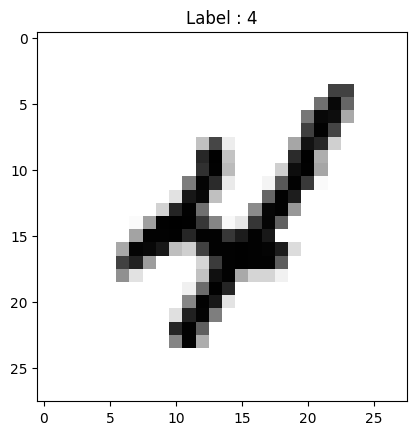

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = x_train[9]
plt.imshow(image, cmap='gray_r')
plt.title(f"Label : {str(y_train[9])}")


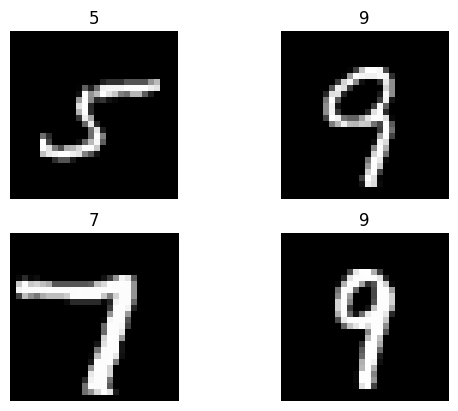

In [7]:
for i in range(1,5):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  plt.subplot(2, 2, i).set_title(f'{y_train[random_num]}')
  plt.axis('off')
  plt.imshow(img, cmap="gray")


## **4.Preprocessing our dataset**

Before passing our data to our CNN for training, we need to prepare it firstly. This entials:
1. Reshaping our data by adding a 4th Dimension
2. Changing our datatype from uint8 to float32
3. Normalizing our data to values between 0 and 1
4. One hot encoding


In [8]:
# Görüntünün satır ve sütun değerlerini değişkenlere atadık

img_rows = x_train[0].shape[0] #satır değeri
img_cols = x_train[0].shape[1] # sütun değeri


In [9]:
# x_train ve x_test veri setlerinin şeklini (num_samples, rows, cols) --> (num_samples, rows, cols,1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [10]:
# giriş şeklini belirliyoruz

input_shape = (img_rows, img_cols, 1)

In [11]:
# değğişken veri tipini uint8'den float32'ye çeviriyoruz

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Gri skala görüntümüz 0-255 arasında değerlerden oluşuyor.
# Biz bunu 0-1 arasına dönüştürerek verilerimizi normalleştiriyoruz.

x_train /= 255.0
x_test /= 255.0

In [13]:
print ("shape : ",x_train.shape)
print ("dimension : ",x_train.ndim)

shape :  (60000, 28, 28, 1)
dimension :  4


#### **One Hot Encode Our Labels (Y)**

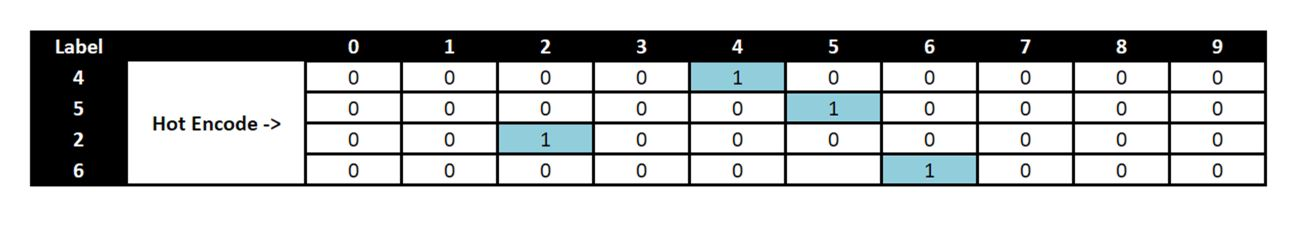

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
num_classes = y_test.shape[1]
num_pixels = img_rows*img_cols # x_train.shape[1] * x_train.shape[2]

## **Building Our Model**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

-  3x3 boyutunda 32 filtre kullanan basit ama etkili bir CNN inşa ediyoruz
- Aynı boyutta 3x3 olan 64 filtreden oluşan 2. bir CONV katmanı ekledik
-  Daha sonra verilerimizi 2x2'ye örnekliyoruz (downsample)
- Daha sonra çıkış boyutu 128 olan Yoğun/FC katmanına bağlı olan Max Pool çıkışımızı düzleştiriyoruz.
- Daha sonra 128 çıkışımızı, 10 kategorik birime çıkış veren başka bir FC/Yoğun katmana bağlarız.

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD


model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


*Çok sınıflı sınıflandırmalarda categorical_crossentropy en çok kullanılır.*

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [19]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test,y_test, verbose=0)

print("Test loss :", score[0])
print('Test Accuracy :', score[1])

Epoch 1/25
469/469 [==============================] - 167s 355ms/step - loss: 2.2370 - accuracy: 0.2525 - val_loss: 2.1476 - val_accuracy: 0.4350
Epoch 2/25
469/469 [==============================] - 169s 360ms/step - loss: 1.8886 - accuracy: 0.5945 - val_loss: 1.4121 - val_accuracy: 0.7447
Epoch 3/25
469/469 [==============================] - 170s 364ms/step - loss: 0.9184 - accuracy: 0.8039 - val_loss: 0.5722 - val_accuracy: 0.8601
Epoch 4/25
469/469 [==============================] - 166s 354ms/step - loss: 0.5011 - accuracy: 0.8650 - val_loss: 0.4112 - val_accuracy: 0.8877
Epoch 5/25
469/469 [==============================] - 172s 366ms/step - loss: 0.4029 - accuracy: 0.8866 - val_loss: 0.3548 - val_accuracy: 0.9002
Epoch 6/25
469/469 [==============================] - 168s 359ms/step - loss: 0.3600 - accuracy: 0.8960 - val_loss: 0.3263 - val_accuracy: 0.9070
Epoch 7/25
469/469 [==============================] - 170s 362ms/step - loss: 0.3337 - accuracy: 0.9028 - val_loss: 0.3037 -

## **7.Ploting our Loss and Accuracy Charts**



In [20]:
history_dict = history.history
history_dict

{'loss': [2.2370076179504395,
  1.8885698318481445,
  0.9184292554855347,
  0.5010676383972168,
  0.40287333726882935,
  0.35999181866645813,
  0.33367782831192017,
  0.31456413865089417,
  0.299260675907135,
  0.28631141781806946,
  0.27494844794273376,
  0.2648026645183563,
  0.2557573616504669,
  0.24738089740276337,
  0.23928193747997284,
  0.23169372975826263,
  0.22472654283046722,
  0.21787793934345245,
  0.21137432754039764,
  0.20552220940589905,
  0.19976891577243805,
  0.1942126303911209,
  0.1889842301607132,
  0.1839880645275116,
  0.1793236881494522],
 'accuracy': [0.2524999976158142,
  0.5945333242416382,
  0.8038666844367981,
  0.8650333285331726,
  0.8865833282470703,
  0.8959500193595886,
  0.9027500152587891,
  0.9077666401863098,
  0.9120333194732666,
  0.9162499904632568,
  0.9194999933242798,
  0.9223333597183228,
  0.9250333309173584,
  0.9272333383560181,
  0.9293666481971741,
  0.9317499995231628,
  0.9339333176612854,
  0.935699999332428,
  0.9380333423614502,

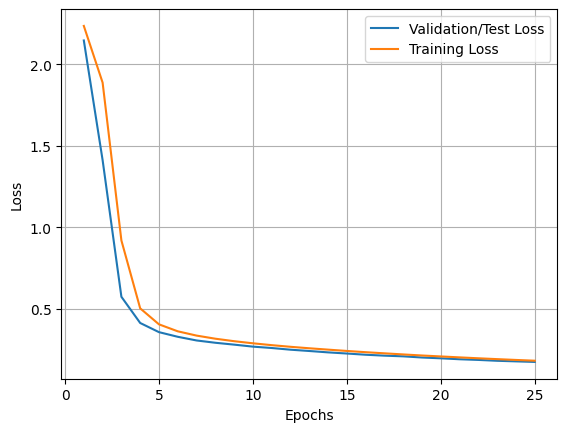

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label ='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True) #siyah çzigiler
plt.legend() # tablo içindeki bilgi kutusunun görünmesini sağlıyor
plt.show()

In [29]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

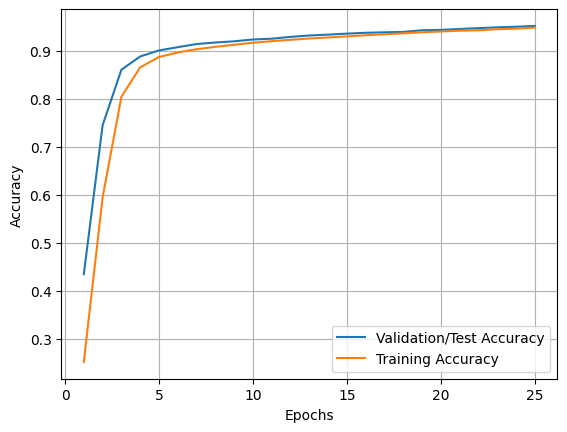

In [30]:
import matplotlib.pyplot as plt

histroy_dict = history.history
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

epochs = range(1, len(loss_values)+1)

line1 =plt.plot(epochs, val_acc_values,label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.grid(True)
plt.legend()
plt.show()

# **8.Saving and Loading our Model**


 ```model.save("model_file_name.h5")```

In [31]:
model.save("mnist_simple_cnn_25_epochs.h5")
print("Model Saved")

Model Saved


**Loading our Saved Model is also simple, just use:**

```load_model(model_file_name.h5)```

In [32]:
from tensorflow.keras.models import load_model

classifier = load_model("/content/mnist_simple_cnn_25_epochs.h5")


## **Getting Predictions from our sample Test Data**

x_test verisini model.predict() ile tahmin ediyoruz ve argmax ile her tahmin sonucunun indeks numarasını alıyoruz.

In [33]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
pred = np.argmax(classifier.predict(x_test), axis=-1)

313/313 [==============================] - 7s 23ms/step


In [36]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
len(pred)

10000

In [40]:
pred[0]

7